In [10]:
import os
from pathlib import Path

import torch
from torch.utils.data import TensorDataset

class ImageNetResized(TensorDataset):
    """ImageNetResized dataset."""
    NUM_CLASSES = 1000

    def __init__(self, root:str, *args, size:int=8, train:bool=False, **kwargs):
        self.root = Path(root)
        assert self.root.is_dir(), f'Root is not a folder: {self.root}'
        self.size = size
        assert size in [8, 16, 32, 64], f'Size not implemented: {size}'
        self.train = train
        self.split: str = 'train' if train else 'val'
        x_path = self.root / f'{size}_{self.split}.pt'
        y_path = self.root / f'{size}_{self.split}_labels.pt'
        x = torch.load(x_path)
        y = torch.load(y_path)
        super().__init__(x, y, *args, **kwargs)


root = Path(os.environ['DSDIR']) / "imagenet_resized"

ds8train = ImageNetResized(root, size=8, train=True)
print(len(ds8train), ds8train[0][0].shape, ds8train[0][1])

ds64val = ImageNetResized(root, size=64, train=False)
print(len(ds64val), ds64val[0][0].shape, ds64val[0][1])




1281167 torch.Size([3, 8, 8]) tensor(568)
50000 torch.Size([3, 64, 64]) tensor(726)


torch.Size([64, 3, 64, 64]) torch.Size([64])


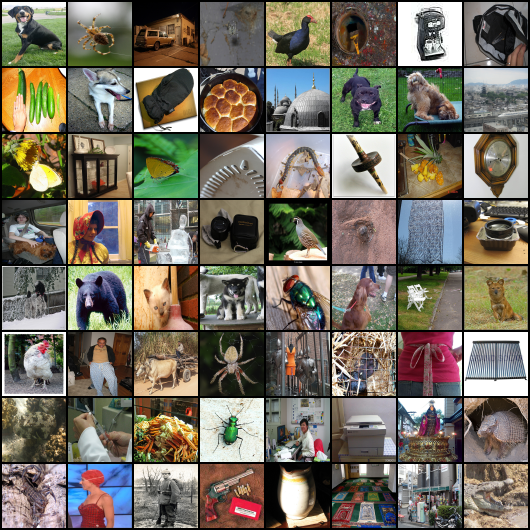

1000 {'index_unoff': 448, 'label_concise': 'tench', 'index': 0, 'label': 'tench, Tinca tinca', 'label_simple': 'tench', 'id': 'n01440764'}


,0,1,2,3,4,5,6,7
0,EntleBucher,garden_spider,beach_wagon,barn_spider,European_gallinule,paintbrush,espresso_maker,backpack
1,cucumber,Siberian_husky,mitten,Dutch_oven,mosque,Staffordshire_bullterrier,Tibetan_terrier,bullet_train
2,sulphur_butterfly,china_cabinet,lycaenid,iron,centipede,spindle,pineapple,barometer
3,Australian_terrier,bonnet,chain_saw,loupe,quail,dung_beetle,stole,loupe
4,standard_poodle,American_black_bear,plunger,malamute,fly,Irish_setter,folding_chair,dhole
5,cock,pajama,oxcart,garden_spider,cuirass,mink,apron,solar_dish
6,puffer,syringe,king_crab,tiger_beetle,desk,photocopier,vestment,armadillo
7,scorpion,bathing_cap,pickelhaube,revolver,pitcher,prayer_rug,toyshop,African_crocodile


In [32]:
from torchvision.utils import make_grid
%matplotlib inline
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pprint import pprint
import pandas as pd

N = 64
nrow = 8
ds = ds64val

indexs = np.random.randint(0, len(ds), N)
samples = [ds[i] for i in indexs]
images = torch.stack([s[0] for s in samples])
labels = torch.stack([s[1] for s in samples])
print(images.shape, labels.shape)

im = make_grid(images.detach(), nrow=nrow)
display(Image.fromarray(im.permute(1, 2, 0).numpy()))

# labels
with open(root / 'imagenet_synset_list.json') as f:
    synsets = json.load(f)
print(len(synsets), synsets[0])

out = [[]]
for i in range(N):
    out[-1].append(synsets[labels[i]]['label_concise'])
    if not i==N-1 and i % nrow == nrow - 1:
        out.append([])

df = pd.DataFrame(out)
display(df)
